# Data Preparation Notebook

This notebook performs data preparation and exploratory analysis on the dialysis facilities dataset. It includes data loading, merging, summary statistics, and visualization steps.

# I. Environment Setup

In [2]:
import pandas as pd
import scripts as func
import numpy as np
import os


# II. DFC AND CHAPS Datasets

## 1. DATA Descritpion

## 2. Load Datasets
This section loads raw data from various CSV files.

### 2.1 Load DFC Facility Data

In [4]:
# Define the path to the data file
notebook_dir = os.path.dirname(os.path.abspath('__file__'))  # Get the directory of the current notebook
project_root = os.path.abspath(os.path.join(notebook_dir, '..', '..'))  # Navigate up two levels to project root
data_dir = os.path.join(project_root, '003_data', '002_clean-data')
file_name = 'national_cms_dialysis-facility_data.parquet'
path_dfc = os.path.join(data_dir, file_name)

# Check if the file exists
if not os.path.exists(path_dfc):
    raise FileNotFoundError(f"The file {path_dfc} does not exist. Please check the file path.")

# Load DFC Facility Data
df_dfc_raw = pd.read_parquet(path_dfc)

# Filter for California
df_dfc_raw_CA = df_dfc_raw[df_dfc_raw['state'] == 'CA']

# Select specific columns
dfc_columns = [
    'provider_number',
    'facility_name',
    'county',
    '_of_dialysis_stations',
    'profit_or_nonprofit',
    'chain_owned',
    'chain_organization',
    'mortality_rate_facility',
    'readmission_rate_facility',
    'patient_hospital_readmission_category'
]

# Create DataFrame with selected columns
df_dfc = df_dfc_raw_CA[dfc_columns]

# Convert CCN to integer, handling any non-numeric values
df_dfc['provider_number'] = pd.to_numeric(df_dfc['provider_number'], errors='coerce').astype('Int64')


C:\Users\kasra\AppData\Local\Temp\ipykernel_2184\3334128368.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dfc['provider_number'] = pd.to_numeric(df_dfc['provider_number'], errors='coerce').astype('Int64')


### 2.2 Load ICH CAHPS Facility Data

In [5]:

# Load ICH CAHPS Facility Data# Define the path to the data file
notebook_dir = os.path.dirname(os.path.abspath('__file__'))  # Get the directory of the current notebook
project_root = os.path.abspath(os.path.join(notebook_dir, '..', '..'))  # Navigate up two levels to project root
data_dir = os.path.join(project_root, '003_data', '001_raw-data')
file_name = '2017-2024_national_cms_dialysis-facility_cahps-data.parquet'
path_chaps = os.path.join(data_dir, file_name)

df_chaps_raw = pd.read_parquet(path_chaps)
df_chaps_RAW_CA = df_chaps_raw[df_chaps_raw['state'] == 'CA']

chaps_columns = [
    "provider_number",
    "total_number_of_completed_interviews_from_the_fall_and_spring_surveys",
    "survey_response_rate",
    "star_rating_of_the_dialysis_facility",
    "ich_cahps_survey_of_patients_experiences_star_rating",
    "linearized_score_of_nephrologists_communication_and_caring",
    "linearized_score_of_quality_of_dialysis_center_care_and_operations",
    "linearized_score_of_providing_information_to_patients",
    "linearized_score_of_rating_of_the_nephrologist",
    "linearized_score_of_rating_of_the_dialysis_center_staff",
    "linearized_score_of_rating_of_the_dialysis_facility",
    'year'
]

df_chaps = df_chaps_RAW_CA[chaps_columns]

# Function to convert to float first, then to Int64
def to_int64(series):
    return pd.to_numeric(series, errors='coerce').astype('Int64')

# Convert columns to Int64
int_columns = [
    "provider_number",
    "total_number_of_completed_interviews_from_the_fall_and_spring_surveys",
    "survey_response_rate",
    "star_rating_of_the_dialysis_facility",
    "ich_cahps_survey_of_patients_experiences_star_rating",
    'year'
]

for col in int_columns:
    df_chaps[col] = to_int64(df_chaps[col])

# Convert score columns to float
score_columns = [
    "linearized_score_of_nephrologists_communication_and_caring",
    "linearized_score_of_quality_of_dialysis_center_care_and_operations",
    "linearized_score_of_providing_information_to_patients",
    "linearized_score_of_rating_of_the_nephrologist",
    "linearized_score_of_rating_of_the_dialysis_center_staff",
    "linearized_score_of_rating_of_the_dialysis_facility"
]

for col in score_columns:
    df_chaps[col] = pd.to_numeric(df_chaps[col], errors='coerce')



C:\Users\kasra\AppData\Local\Temp\ipykernel_2184\1189730666.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chaps[col] = to_int64(df_chaps[col])
C:\Users\kasra\AppData\Local\Temp\ipykernel_2184\1189730666.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chaps[col] = pd.to_numeric(df_chaps[col], errors='coerce')


## 3. Data Merging
This section merges the loaded datasets based on common columns.

In [6]:
# Merge DFC and CHAPS data
df_fasc = df_dfc.merge(df_chaps, on='provider_number', how='left')

# Update data dictionary with new column names
data_dict = {
    'provider_number': 'CNN',
    'facility_name': 'FAC_NAME',
    'county': 'COUNTY',
    '_of_dialysis_stations': 'STATIONS',
    'profit_or_nonprofit': 'PROF_NP',
    'chain_owned': 'CHAIN_OWN',
    'chain_organization': 'CHAIN_ORG',
    'linearized_score_of_nephrologists_communication_and_caring': 'COMM_SCR',
    'linearized_score_of_quality_of_dialysis_center_care_and_operations': 'QUALITY_SCR',
    'linearized_score_of_providing_information_to_patients': 'INFO_SCR',
    'linearized_score_of_rating_of_the_nephrologist': 'PHYS_SCR',
    'linearized_score_of_rating_of_the_dialysis_center_staff': 'STAFF_SCR',
    'linearized_score_of_rating_of_the_dialysis_facility': 'FAC_SCR',
    'star_rating_of_the_dialysis_facility': 'FAC_STAR',
    'total_number_of_completed_interviews_from_the_fall_and_spring_surveys': 'SURVEY_COUNT',
    'ich_cahps_survey_of_patients_experiences_star_rating': 'XP_STAR',
    'survey_response_rate': 'SURVEY_RATE',
    'year': 'YEAR'
}

df_fasc.rename(columns=data_dict, inplace=True)


# Function to clean county names
def clean_county_name(name):
    if pd.isna(name) or name.strip() == '':
        return None
    name = name.strip().title()
    if name == 'Del Norte':
        return 'Del Norte'
    return name

# Clean county names
df_fasc['COUNTY'] = df_fasc['COUNTY'].apply(clean_county_name)


# Convert numeric columns to appropriate data type
numeric_columns = ['STATIONS', 'SURVEY_COUNT', 'SURVEY_RATE', 'FAC_STAR', 'XP_STAR', 
                   'COMM_SCR', 'QUALITY_SCR', 'INFO_SCR', 'PHYS_SCR', 'STAFF_SCR', 'FAC_SCR', 'YEAR']
for col in numeric_columns:
    df_fasc[col] = pd.to_numeric(df_fasc[col], errors='coerce')

# Move 'YEAR' column to the leftmost position
columns = df_fasc.columns.tolist()
columns.remove('YEAR')
df_fasc = df_fasc[['YEAR'] + columns]


## 4. Basic Data Exploration
This section provides a brief overview of the merged dataset, including data types, summary statistics, and missing values.

In [ ]:
print(df_fasc.COUNTY.unique())

In [ ]:
# Display dataset information
df_fasc.info()

In [ ]:
# Summary statistics for numerical columns
# Summary statistics for numerical columns
df_fasc.describe().T

In [ ]:
# Value counts for 'CHAIN_ORG' column

# Value counts for categorical columns
df_fasc['CHAIN_ORG'].value_counts()


YEAR                                         3
CNN                                          0
FAC_NAME                                     0
COUNTY                                     800
STATIONS                                     0
PROF_NP                                      0
CHAIN_OWN                                    0
CHAIN_ORG                                    0
mortality_rate_facility                   1340
readmission_rate_facility                 1521
patient_hospital_readmission_category     4448
SURVEY_COUNT                             14237
SURVEY_RATE                              31177
FAC_STAR                                 14237
XP_STAR                                  31177
COMM_SCR                                 14237
QUALITY_SCR                              14237
INFO_SCR                                 14237
PHYS_SCR                                 14237
STAFF_SCR                                14237
FAC_SCR                                  14237
dtype: int64


<Axes: >

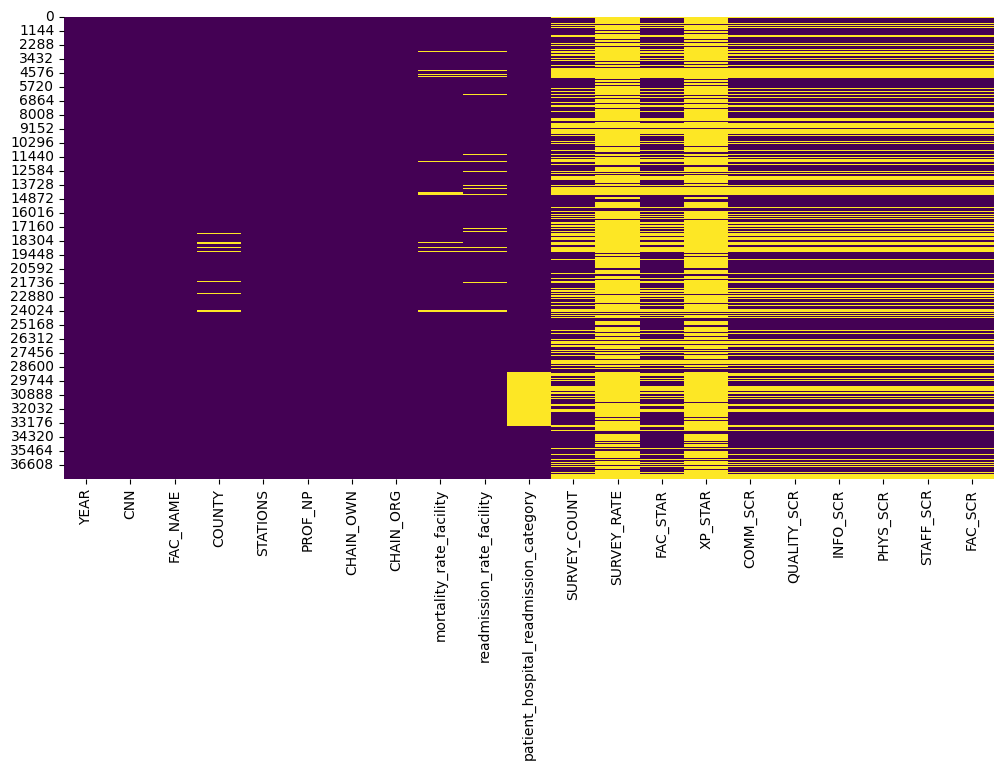

In [7]:
# Count missing values in each column
# Count missing values in each column
missing_counts = df_fasc.isnull().sum()
print(missing_counts)
# Visualizing missing data using seaborn
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.heatmap(df_fasc.isnull(), cbar=False, cmap='viridis')


In [ ]:
# List all columns in the dataset
df_fasc.info()

## 5. Data Visualization
This section includes visualizations to explore data distributions and relationships between variables.

In [ ]:
# Plot distributions for selected columns by chain ownership
import seaborn as sns

columns = ['STATIONS', 'SURVEY_COUNT', 'SURVEY_RATE', 'FAC_STAR', 'XP_STAR', 'COMM_SCR', 'QUALITY_SCR', 'INFO_SCR', 'PHYS_SCR', 'STAFF_SCR', 'FAC_SCR']
# Create the pairplot with the filtered columns
sns.pairplot(data=df_fasc, vars = columns, hue='CHAIN_OWN')


In [ ]:
# Further visualizations for selected columns by profit or non-profit:
columns = ['STATIONS', 'SURVEY_COUNT', 'SURVEY_RATE', 'FAC_STAR', 'XP_STAR', 'COMM_SCR', 'QUALITY_SCR', 'INFO_SCR', 'PHYS_SCR', 'STAFF_SCR', 'FAC_SCR']
sns.pairplot(data=df_fasc, vars = columns, hue='PROF_NP')


## 6. Data Aggregation
This section performs aggregation on the dataset, grouping by specific columns.

In [8]:
# Create a copy of the dataframe for aggregation
df_agg = df_fasc.copy()

# Convert PROF_NP and CHAIN_OWN to numeric if they're not already
df_agg['PROF_NP'] = df_agg['PROF_NP'].map({'profit': 1, 'non_profit': 0}).astype('Int64')
df_agg['CHAIN_OWN'] = df_agg['CHAIN_OWN'].map({'yes': 1, 'no': 0}).astype('Int64')

# Aggregate data by county
agg_funcs = {
    'CNN': 'count',  # Changed from 'CCN' to 'CNN'
    'STATIONS': 'sum',
    'PROF_NP': 'mean',
    'CHAIN_OWN': 'mean',
    'SURVEY_COUNT': 'sum',
    'SURVEY_RATE': 'mean',
    'FAC_STAR': 'mean',
    'XP_STAR': 'mean',
    'COMM_SCR': 'mean',
    'QUALITY_SCR': 'mean',
    'INFO_SCR': 'mean',
    'PHYS_SCR': 'mean',
    'STAFF_SCR': 'mean',
    'FAC_SCR': 'mean'
}

# List of columns to keep after aggregation
agg_col = ['COUNTY', 'YEAR', 'FAC_COUNT', 'STATIONS', 'PROF_NP', 'CHAIN_OWN', 'SURVEY_COUNT',
           'SURVEY_RATE', 'FAC_STAR', 'XP_STAR', 'COMM_SCR', 'QUALITY_SCR',
           'INFO_SCR', 'PHYS_SCR', 'STAFF_SCR', 'FAC_SCR']

# Perform the aggregation
df_agg = df_agg.groupby(['YEAR', 'COUNTY']).agg(agg_funcs).reset_index()

# Rename the count column
df_agg.rename(columns={'CNN': 'FAC_COUNT'}, inplace=True)

# Select only the columns we want to keep
df_agg = df_agg[agg_col]

# Display the first few rows of the aggregated dataframe
df_agg.head()


,COUNTY,YEAR,FAC_COUNT,STATIONS,PROF_NP,CHAIN_OWN,SURVEY_COUNT,SURVEY_RATE,FAC_STAR,XP_STAR,COMM_SCR,QUALITY_SCR,INFO_SCR,PHYS_SCR,STAFF_SCR,FAC_SCR
0,Alameda,2018,240,4733,0.820833,1.0,8426,<NA>,3.44586,<NA>,81.248408,81.433121,79.757962,84.738854,86.522293,87.980892
1,Butte,2018,32,584,0.75,1.0,1040,<NA>,3.666667,<NA>,80.666667,83.000000,84.000000,86.333333,87.666667,89.333333
2,Columbia,2018,2,26,1.0,1.0,80,<NA>,4.0,<NA>,84.000000,88.000000,75.000000,89.000000,93.000000,90.000000
3,Contra Costa,2018,137,2690,0.985401,1.0,6096,<NA>,3.071429,<NA>,79.928571,79.571429,77.428571,82.642857,85.857143,86.928571
4,El Dorado,2018,8,185,1.0,1.0,632,<NA>,4.0,<NA>,87.000000,86.000000,84.000000,85.000000,88.000000,90.000000


In [ ]:
# Display aggregated dataset information
df_agg.info()

In [ ]:
import plotly.express as px

def plot_treemap(df, year):
    # Filter data for the specified year
    df_agg_treemap = df[df['YEAR'] == year]
    
    # Check if there's any data for the specified year
    if df_agg_treemap.empty:
        print(f"No data available for year {year}")
        return
    
    # Remove rows with null values in FAC_STAR or STATIONS
    df_agg_treemap = df_agg_treemap.dropna(subset=['FAC_STAR', 'STATIONS'])
    
    # Check if there's any data left after removing null values
    if df_agg_treemap.empty:
        print(f"No valid data available for year {year} after removing null values")
        return
    
    # Calculate the average FAC_STAR, handling potential division by zero
    total_stations = df_agg_treemap['STATIONS'].sum()
    if total_stations > 0:
        avg_fac_star = np.average(df_agg_treemap['FAC_STAR'], weights=df_agg_treemap['STATIONS'])
    else:
        avg_fac_star = df_agg_treemap['FAC_STAR'].mean()  # Unweighted average if no stations
    
    # Create the treemap
    fig = px.treemap(df_agg_treemap, 
                     path=['COUNTY'], 
                     values='STATIONS',
                     color='FAC_STAR', 
                     hover_data=df_agg_treemap.columns,
                     color_continuous_scale='RdBu',
                     color_continuous_midpoint=avg_fac_star)
    
    # Update layout
    fig.update_layout(
        title_text=f"County-Level Facility Data Treemap for Year {year}",
        coloraxis_colorbar=dict(title="Facility Star Rating"),
    )
    
    # Show the plot
    fig.show()

# Example usage:
plot_treemap(df_agg, 2020)

In [ ]:
# Pairplot for aggregated data
df_plot = df_agg[df_agg['YEAR']==2020]
sns.pairplot(data=df_plot)

## 7. Export Cleaned Data

In [9]:
base_dir = os.path.dirname(os.path.dirname(os.getcwd()))
agg_output_file = os.path.join(base_dir, '009_supplemental', 'cleaned data', 'FASCILITY_CLEANED.csv')

# Save the aggregated data to CSV
df_agg.to_csv(agg_output_file, index=False)

base_dir = os.path.dirname(os.path.dirname(os.getcwd()))
non_agg_output_file = os.path.join(base_dir, '009_supplemental', 'cleaned data', 'FASCILITY_RECORDS_CLEANED.csv')

# Save the aggregated data to CSV
df_fasc.to_csv(non_agg_output_file, index=False)


# III. Medicare Dataset

## 1. DATA Descritpion

## 2. Load Datasets
This section loads raw data from various CSV files.

### 2.1 Load Medicare Data:

In [ ]:
# Load DFC Facility Data
path_medicare = r'003_data\001_raw-data\MEDICARE\Medicare.csv'
df_medicare_raw = pd.read_csv(path_medicare, low_memory=False)
df_medicare_raw_COUNTY = df_medicare_raw[df_medicare_raw['BENE_GEO_LVL'] == 'County']
df_medicare_raw_CA = df_medicare_raw_COUNTY[df_medicare_raw_COUNTY['BENE_GEO_DESC'].str.startswith('CA-')]
df_medicare_raw_CA['COUNTY'] = df_medicare_raw_CA['BENE_GEO_DESC'].str.split('-').str[1]
df_medicare = df_medicare_raw_CA.copy()

def medicare_filter(df, year_range, columns):
    years = range(year_range[0], year_range[1]+1)
    df = df[df['YEAR'].isin(years)]
    df = df[columns]
    return df

year_range = (2014, 2022)
columns = [
    'YEAR',
    'COUNTY',
    'OP_DLYS_MDCR_PYMT_AMT',
    'OP_DLYS_MDCR_PYMT_PCT',
    'OP_DLYS_MDCR_PYMT_PC',
    'OP_DLYS_MDCR_PYMT_PER_USER',
    'OP_DLYS_MDCR_STDZD_PYMT_AMT',
    'OP_DLYS_MDCR_STDZD_PYMT_PCT',
    'OP_DLYS_MDCR_STDZD_PYMT_PC',
    'OP_DLYS_MDCR_STDZD_PYMT_PER_USER',
    'BENES_OP_DLYS_CNT',
    'BENES_OP_DLYS_PCT',
    'OP_DLYS_VISITS_PER_1000_BENES'
]


df_dial = medicare_filter(df_medicare, year_range, columns)

df_dial.head()

## 2. Basic Data Exploration
This section provides a brief overview of the Medicare dataset, including data types, summary statistics, and missing values.

In [ ]:
df_dial.replace('*', np.nan, inplace=True)
df_dial['COUNTY'].replace('UNKNOWN', np.nan, inplace=True)
# Display dataset information
column_name_mapping = {
    'YEAR': 'YEAR',
    'COUNTY': 'COUNTY',
    'OP_DLYS_MDCR_PYMT_AMT': 'PYMT_AMT',
    'OP_DLYS_MDCR_PYMT_PCT': 'PYMT_PCT',
    'OP_DLYS_MDCR_PYMT_PC': 'PYMT_PC',
    'OP_DLYS_MDCR_PYMT_PER_USER': 'PYMT_PER_USER',
    'OP_DLYS_MDCR_STDZD_PYMT_AMT': 'STDZ_PYMT_AMT',
    'OP_DLYS_MDCR_STDZD_PYMT_PCT': 'STDZ_PYMT_PCT',
    'OP_DLYS_MDCR_STDZD_PYMT_PC': 'STDZ_PYMT_PC',
    'OP_DLYS_MDCR_STDZD_PYMT_PER_USER': 'STDZ_PYMT_PER_USER',
    'BENES_OP_DLYS_CNT': 'USER_CNT',
    'BENES_OP_DLYS_PCT': 'USER_PCT',
    'OP_DLYS_VISITS_PER_1000_BENES': 'VISITS_PER_1000'
}

column_description_mapping = {
    'YEAR': 'Year of the Medicare data',
    'COUNTY': 'Geographical region (County)',
    'PYMT_AMT': 'Total Medicare Payment Amount for Outpatient Dialysis',
    'PYMT_PCT': 'Medicare Payment as Percentage of Total Payment for Outpatient Dialysis',
    'PYMT_PC': 'Per Capita Medicare Payment for Outpatient Dialysis',
    'PYMT_PER_USER': 'Medicare Payment per User for Outpatient Dialysis',
    'STDZ_PYMT_AMT': 'Standardized Medicare Payment Amount for Outpatient Dialysis',
    'STDZ_PYMT_PCT': 'Standardized Payment as Percentage of Total Payment for Outpatient Dialysis',
    'STDZ_PYMT_PC': 'Per Capita Standardized Medicare Payment for Outpatient Dialysis',
    'STDZ_PYMT_PER_USER': 'Standardized Payment per User for Outpatient Dialysis',
    'USER_CNT': 'Number of Users of Outpatient Dialysis Services',
    'USER_PCT': 'Percentage of Beneficiaries Using Outpatient Dialysis',
    'VISITS_PER_1000': 'Outpatient Dialysis Visits per 1,000 Beneficiaries'
}
df_dial.rename(columns=column_name_mapping, inplace=True)


# Convert specified columns to int and str, handling NaN values
df_dial['YEAR'] = pd.to_numeric(df_dial['YEAR'], errors='coerce').fillna(0).astype(int)
df_dial['COUNTY'] = df_dial['COUNTY'].astype(str)
df_dial['USER_CNT'] = pd.to_numeric(df_dial['USER_CNT'], errors='coerce').fillna(0).astype(int)

# Convert all other columns to float, ignoring NaN values
float_columns = [col for col in df_dial.columns if col not in ['YEAR', 'COUNTY', 'USER_CNT']]
df_dial[float_columns] = df_dial[float_columns].apply(pd.to_numeric, errors='coerce')

df_dial.info()

In [ ]:
# Create a mask of missing values, grouping by COUNTY
missing_data = df_dial.isnull()

# Plot the heatmap with COUNTY on the y-axis
plt.figure(figsize=(12, 8))
sns.heatmap(missing_data, cbar=False, cmap='viridis')
plt.title('Missing Values by County')
plt.xlabel('Columns')
plt.show()

In [ ]:
# Aggregate by 'COUNTY' and compute the mean of all other numerical columns, excluding 'YEAR'
df_dial_agg = df_dial.groupby(['YEAR', 'COUNTY']).mean(numeric_only=True).reset_index()

# Display the first few rows of the aggregated dataframe
df_dial_agg.head()

In [ ]:
# Create a mask of missing values, grouping by COUNTY
missing_data = df_dial_agg.set_index('COUNTY').isnull()

# Plot the heatmap with COUNTY on the y-axis
plt.figure(figsize=(12, 8))
sns.heatmap(missing_data, cbar=False, cmap='viridis', yticklabels=True)
plt.title('Missing Values by County')
plt.xlabel('Columns')
plt.show()

## 5. Data Visualization
This section includes visualizations to explore data distributions and relationships between variables.

In [ ]:
# Plot distributions for selected columns
import seaborn as sns
df_ploy = df_dial_agg[df_dial_agg['YEAR'] == 2020]
sns.pairplot(data=df_dial_agg)


In [ ]:
df_agg_treemap = df_dial_agg.dropna()
df_agg_treemap.drop(df_agg_treemap[df_agg_treemap['USER_CNT'] == 0].index, inplace=True)

fig = px.treemap(df_agg_treemap, path=['COUNTY'], values='USER_CNT',
                  color='STDZ_PYMT_PC', hover_data=df_dial_agg.columns,
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df_agg_treemap['STDZ_PYMT_PC'], weights=df_agg_treemap['USER_CNT']))
fig.show()

## 6. Export Cleaned Data

In [ ]:
df_dial_agg_export = df_dial_agg.reset_index(drop=True)
df_dial_agg_export.to_csv(r'009_supplemental\cleaned data\MEDICARE_CLEANED.csv', index=False)